In [1]:
!pip install matplotlib

import os
import time
from google.colab import drive
import matplotlib.pyplot as plt

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive/')

# Name for VBFL share folder
vbflshare = '/content/drive/My Drive/VBFL'

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


All 2 minute files found and are not empty. Proceeding with comparison.
All 5 minute files found and are not empty. Proceeding with comparison.


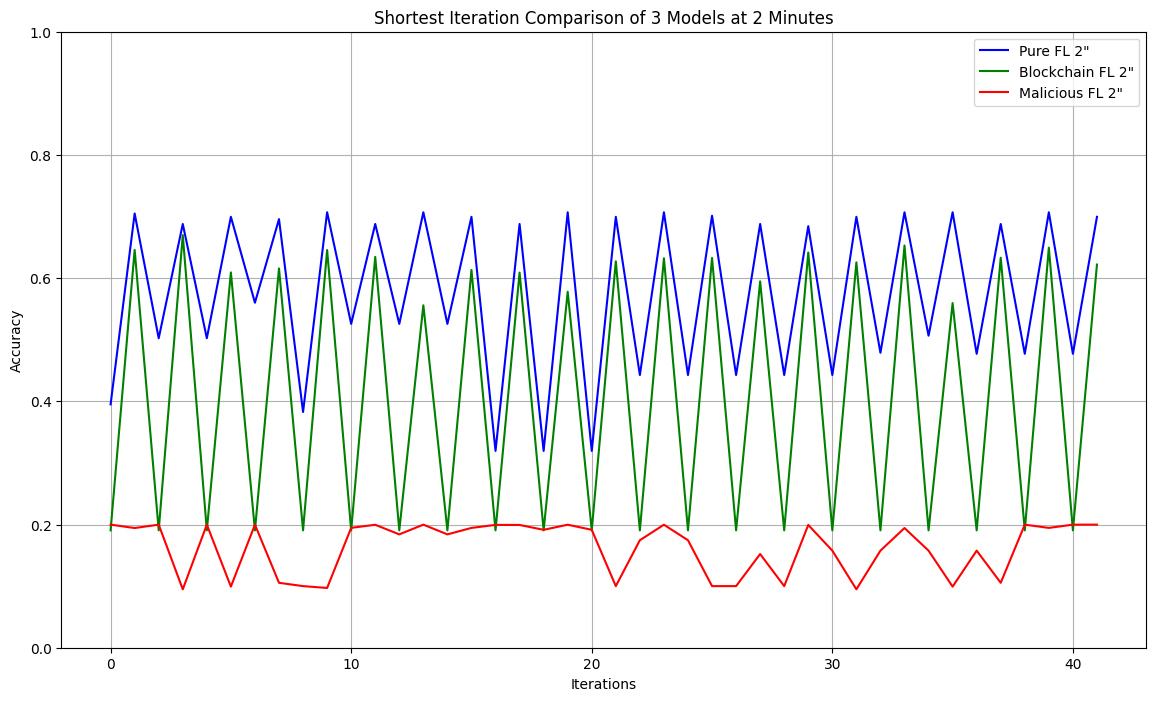

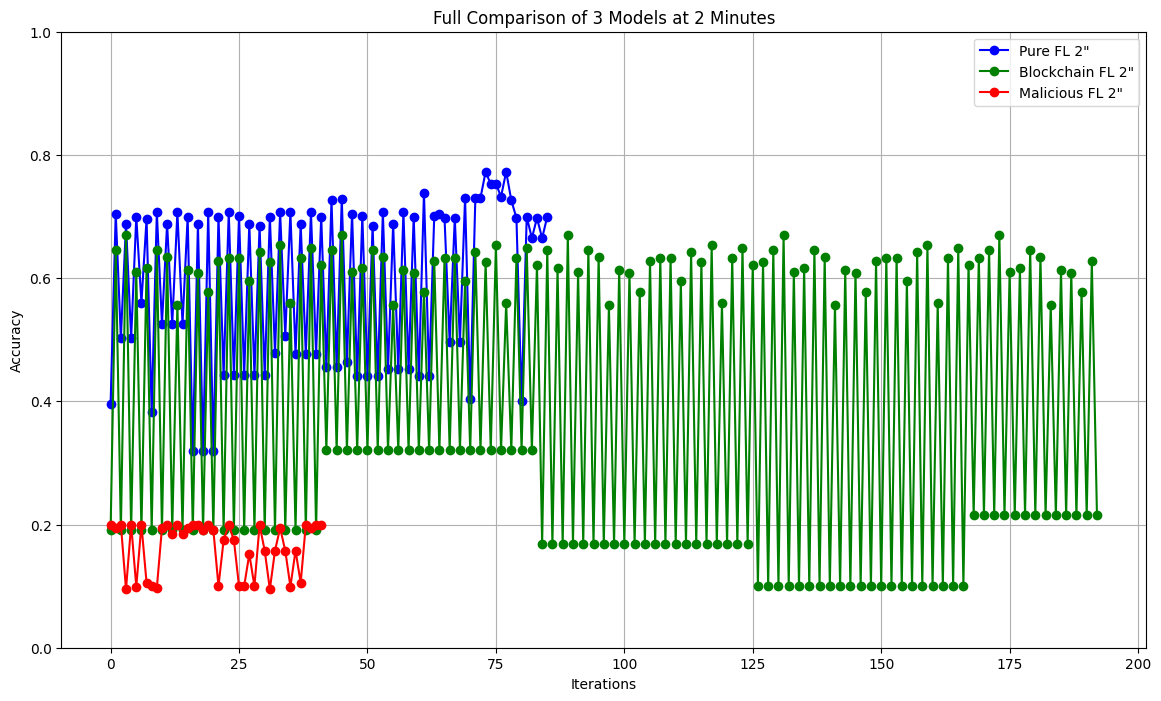

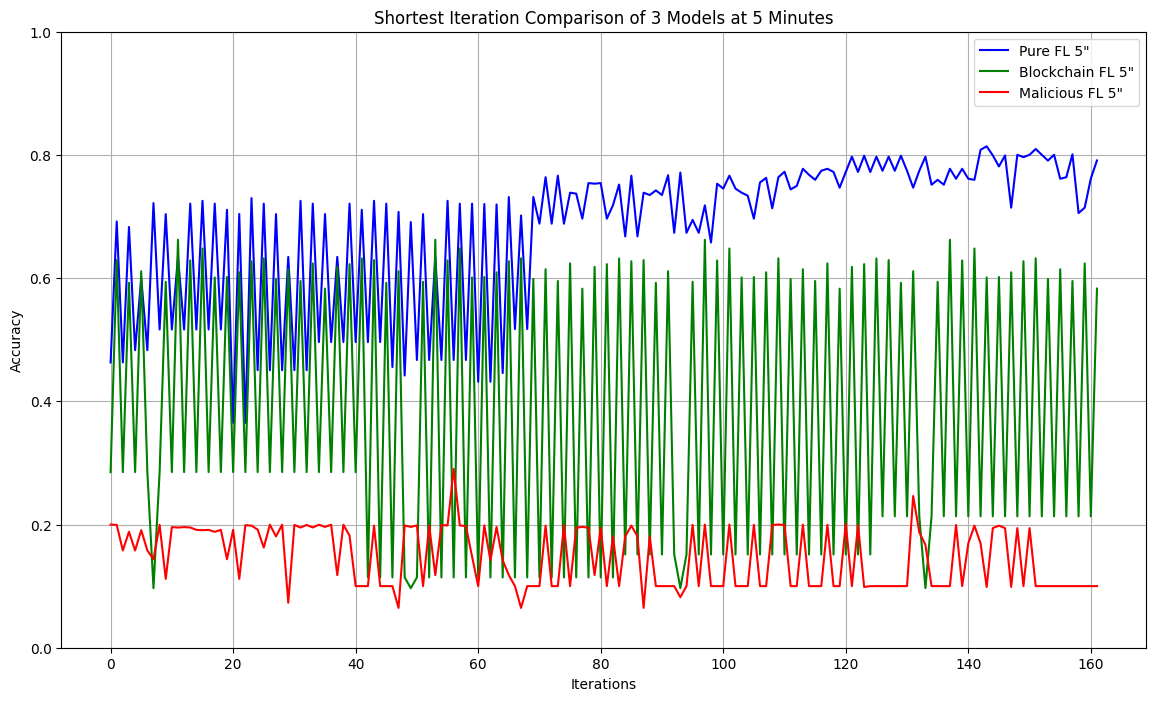

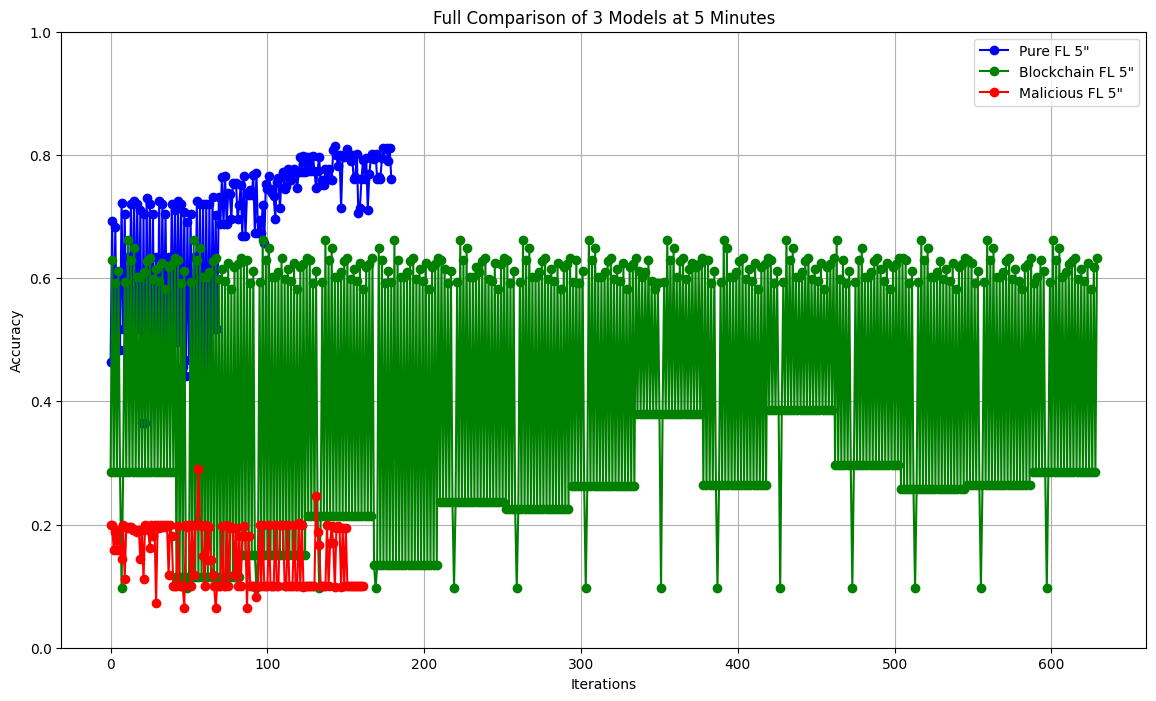

In [23]:
import os
import time
import matplotlib.pyplot as plt

# Define the shared folder path
vbflshare = '/content/drive/My Drive/VBFL'

# Define colors for each model
colors = {'pure': 'blue', 'blockchain': 'green', 'malicious': 'red'}

# Function to check for file existence and that they are not empty
def check_files_exist(file_paths):
    return all(os.path.isfile(file_path) and os.path.getsize(file_path) > 0 for file_path in file_paths)

# Function to wait for all files of a certain minute mark to be available and non-empty
def wait_for_files(file_sets):
    for minute_mark, file_set in file_sets.items():
        while not check_files_exist(file_set.values()):
            print(f"Waiting for {minute_mark} minute files to be available and non-empty in the shared folder...")
            time.sleep(60)  # Check every 60 seconds
        print(f"All {minute_mark} minute files found and are not empty. Proceeding with comparison.")

# Function to read data from the output files and extract accuracies
def read_data(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    accuracies = []
    for line in lines:
        if "model accuracy becomes" in line or "validator updated model accuracy" in line:
            parts = line.split('-')
            if len(parts) == 2:
                try:
                    accuracy = float(parts[1].strip())
                    accuracies.append(accuracy)
                except ValueError as e:
                    print(f"Error parsing line '{line}': {e}")
    return accuracies

# Function to plot accuracies for both full and shortest length
def plot_accuracies(file_set, colors, minute_mark):
    data = {}

    # Read data from each file and store it
    for model_name, file_path in file_set.items():
        data[model_name] = read_data(file_path)

    # Find the shortest length of accuracies
    min_length = min(len(acc) for acc in data.values())

    # Plot shortest length iterations for each model
    plt.figure(figsize=(14, 8))
    for model_name, accuracies in data.items():
        label_name = f'{model_name.capitalize()} FL {minute_mark}"'
        plt.plot(range(min_length), accuracies[:min_length], label=label_name, color=colors[model_name])
    plt.title(f'Shortest Iteration Comparison of 3 Models at {minute_mark} Minutes')
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot the full iterations for each model
    plt.figure(figsize=(14, 8))
    for model_name, accuracies in data.items():
        label_name = f'{model_name.capitalize()} FL {minute_mark}"'
        plt.plot(accuracies, label=label_name, color=colors[model_name], marker='o')
    plt.title(f'Full Comparison of 3 Models at {minute_mark} Minutes')
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend()
    plt.grid(True)
    plt.show()

# Prepare the list of files for 2 and 5 minute marks
file_sets = {
    '2': {model: os.path.join(vbflshare, f'output_{model}2.txt') for model in colors},
    '5': {model: os.path.join(vbflshare, f'output_{model}5.txt') for model in colors}
}

# Wait for all file sets
wait_for_files(file_sets)

# Plot for each minute mark
for minute_mark, model_files in file_sets.items():
    plot_accuracies(model_files, colors, minute_mark)
